In [2]:
import source_synphot.passband
import source_synphot.io
import source_synphot.source
import astropy.table as at
from collections import OrderedDict
import pysynphot as S
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook
#%pylab

In [3]:
def myround(x, prec=2, base=.5):
    return round(base * round(float(x)/base),prec)

In [4]:
models = at.Table.read('ckmodels.txt',format='ascii')
logZ = 0.
model_sed_names = []
temp = []
for s in models:
    teff = max(3500.,s['teff'])
    logg = myround(s['logg'])
    # the models with logg < 1 are just padded with 0s
    if logg >= 1:
        temp.append(teff)
        modstring = 'ckmod{:.0f}_{:.1f}_{:.2f}'.format(teff,logZ, logg)
        model_sed_names.append(modstring)
model_sed = source_synphot.source.load_source(model_sed_names)

/Users/ryanr/Documents/PhD/coding/source_synphot/source_synphot/source.py:50: RuntimeWarning: Source ckmod44852_0.0_4.00 not loaded
  warnings.warn(message, RuntimeWarning)
/Users/ryanr/Documents/PhD/coding/source_synphot/source_synphot/source.py:50: RuntimeWarning: Source ckmod42857_0.0_4.00 not loaded
  warnings.warn(message, RuntimeWarning)
/Users/ryanr/Documents/PhD/coding/source_synphot/source_synphot/source.py:50: RuntimeWarning: Source ckmod40862_0.0_4.00 not loaded
  warnings.warn(message, RuntimeWarning)
/Users/ryanr/Documents/PhD/coding/source_synphot/source_synphot/source.py:50: RuntimeWarning: Source ckmod39865_0.0_4.00 not loaded
  warnings.warn(message, RuntimeWarning)
/Users/ryanr/Documents/PhD/coding/source_synphot/source_synphot/source.py:50: RuntimeWarning: Source ckmod40300_0.0_3.50 not loaded
  warnings.warn(message, RuntimeWarning)
/Users/ryanr/Documents/PhD/coding/source_synphot/source_synphot/source.py:50: RuntimeWarning: Source ckmod39000_0.0_3.00 not loaded
  w

In [5]:
model_sed_names

['ckmod44852_0.0_4.00',
 'ckmod42857_0.0_4.00',
 'ckmod40862_0.0_4.00',
 'ckmod39865_0.0_4.00',
 'ckmod38867_0.0_4.00',
 'ckmod37870_0.0_4.00',
 'ckmod36872_0.0_4.00',
 'ckmod35874_0.0_4.00',
 'ckmod34877_0.0_4.00',
 'ckmod33879_0.0_4.00',
 'ckmod32882_0.0_4.00',
 'ckmod31884_0.0_4.00',
 'ckmod30000_0.0_4.00',
 'ckmod25400_0.0_4.00',
 'ckmod18700_0.0_4.00',
 'ckmod15400_0.0_4.00',
 'ckmod11900_0.0_4.00',
 'ckmod9520_0.0_4.00',
 'ckmod9230_0.0_4.00',
 'ckmod8270_0.0_4.00',
 'ckmod8200_0.0_4.50',
 'ckmod7200_0.0_4.50',
 'ckmod6890_0.0_4.50',
 'ckmod6440_0.0_4.50',
 'ckmod6200_0.0_4.50',
 'ckmod6030_0.0_4.50',
 'ckmod5860_0.0_4.50',
 'ckmod5770_0.0_4.50',
 'ckmod5570_0.0_4.50',
 'ckmod5250_0.0_4.50',
 'ckmod4780_0.0_4.50',
 'ckmod4560_0.0_4.50',
 'ckmod4350_0.0_4.50',
 'ckmod4060_0.0_4.50',
 'ckmod3850_0.0_4.50',
 'ckmod3580_0.0_4.50',
 'ckmod3500_0.0_5.00',
 'ckmod3500_0.0_5.00',
 'ckmod3500_0.0_5.00',
 'ckmod29000_0.0_3.50',
 'ckmod15000_0.0_3.50',
 'ckmod5850_0.0_3.00',
 'ckmod5150_0.0

In [8]:
source_synphot.source.load_source(['/Users/ryanr/Documents/PhD/coding/WDdata/out/g191b2b-20150124-total/g191b2b-20150124-total_full_model.hdf5'])

OrderedDict()

In [4]:
#passbands = at.Table.read('source_synphot/passbands/pbzptmag.txt',format='ascii')
#pbnames = [x['obsmode'] for x in passbands if x['passband'].startswith("WFIRST")]
model_mags = 0.
model = 'AB'
pbnames = ['sdss,g', 'sdss,r', 'sdss,i', 'sdss,z']
pbs = source_synphot.passband.load_pbs(pbnames, model_mags, model)
pbnames = pbs.keys()

sdss,g
sdss,r
sdss,i
sdss,z


In [5]:
pbs

OrderedDict([('sdss,g',
              (<pysynphot.spectrum.TabularSpectralElement at 0x11aca2d50>,
               -20.76952446164697)),
             ('sdss,r',
              (<pysynphot.spectrum.TabularSpectralElement at 0x1099bc1d0>,
               -21.36127098719541)),
             ('sdss,i',
              (<pysynphot.spectrum.TabularSpectralElement at 0x11a7dfad0>,
               -21.78028499625155)),
             ('sdss,z',
              (<pysynphot.spectrum.TabularSpectralElement at 0x11a5980d0>,
               -22.166199316256655))])

In [6]:
print(pbnames)

odict_keys(['R606', 'Z087', 'Y106', 'J129', 'H158', 'F184', 'sdss,g', 'sdss,r', 'sdss,i', 'sdss,z'])


In [13]:
color1 = 'sdss,g_sdss,r'
color2 = 'sdss,r_sdss,i'
col1 = []
col2 = []
# construct color-color vectors
for modelname in model_sed:
    model= model_sed[modelname]
    model = S.ArraySpectrum(model.wave, model.flux, name=modelname)
    c1, c2 = color1.split('_')
    pb1, zp1 = pbs[c1]
    pb2, zp2 = pbs[c2]
    c3, c4 = color2.split('_')
    pb3, zp3 = pbs[c3]
    pb4, zp4 = pbs[c4]
    thiscol1 = source_synphot.passband.syncolor(model, pb1, pb2, zp1, zp2)
    thiscol2 = source_synphot.passband.syncolor(model, pb3, pb4, zp3, zp4)
    col1.append(thiscol1)
    col2.append(thiscol2)
col1 = np.array(col1)
col2 = np.array(col2)
# select only useful objects
good = ~np.isnan(col1)* ~np.isnan(col2)
good = np.array(good)

<IPython.core.display.Javascript object>


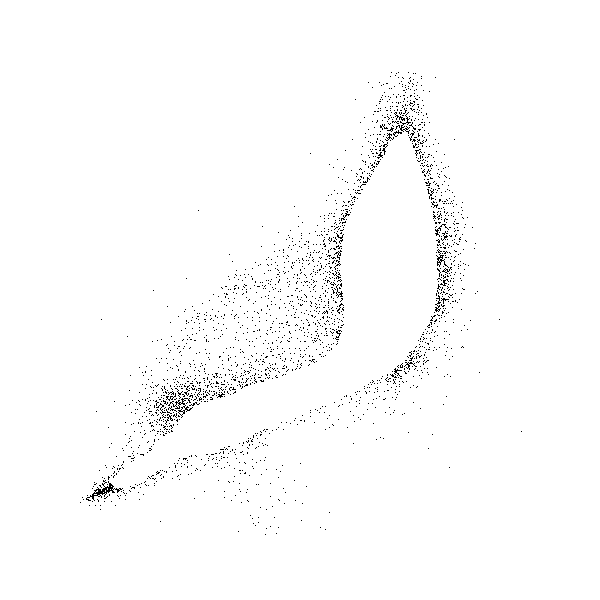

In [16]:

from astroML.plotting import scatter_contour
from astroML.datasets import fetch_sdss_S82standards
from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=True)

data = fetch_sdss_S82standards()

g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

fig, ax = plt.subplots(figsize=(6, 6))
scatter_contour(g - r, r - i, threshold=200, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=40),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.bone))

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

ax.set_xlim(-0.6, 2.5)
ax.set_ylim(-0.6, 2.5)
plt.plot(col1[good], col2[good], marker='o', linestyle='None')

In [8]:
z = np.linspace(1e-8, 0.2, 1000, endpoint=True)

In [9]:
outspec = source_synphot.source.pre_process_source('./sn2000fa-20001215.flm',15.3,pbs['sdss,r'][0],0.021)

/Users/rridden/code/source_synphot/source_synphot/source.py:107: RuntimeWarning: Spectrum ./sn2000fa-20001215.flm not listed in lookup table
  warnings.warn(message, RuntimeWarning)


-19.522973025211357

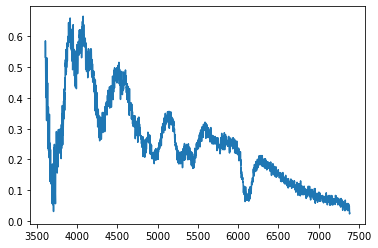

In [10]:
plt.figure()
plt.plot(outspec.wave, outspec.flux)
source_synphot.passband.synphot(outspec, pbs['sdss,r'][0], zp=pbs['sdss,r'][1])
# if you believe the observations, this should be kinda like the absolute magnitude of an SNIa at peak.

In [11]:
mag = source_synphot.passband.synphot_over_redshifts(outspec, z, pbs['sdss,r'][0], pbs['sdss,r'][1])

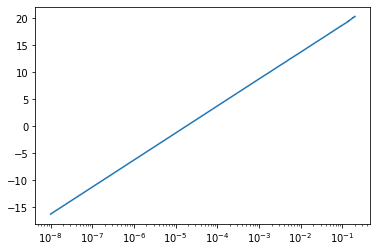

In [15]:
plt.figure()
plt.plot(z, mag)
plt.xscale('log')

In [16]:
ind = np.abs(z-0.021).argmin()
print(mag[ind])
# We should get back what we normalized to for input at the same redshift. Not bad!

15.284856185652256
